# BIBLIOTECAS

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# BASE DE DATOS


In [14]:
df = pd.read_excel('/content/VINOS-ARGENTINA-ITALIA.xlsx')

In [3]:
df.head()

,Column1,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,1,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87.0,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,2,Italy,"Here's a bright, informal red that opens with ...",Belsito,87.0,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
2,3,Italy,This is dominated by oak and oak-driven aromas...,Rosso,87.0,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Masseria Setteporte 2012 Rosso (Etna),Nerello Mascalese,Masseria Setteporte
3,4,Argentina,"Baked plum, molasses, balsamic vinegar and che...",Felix,87.0,30.0,Salta,Cafayate,NaN,Michael Schachner,@wineschach,Felix Lavaque 2010 Felix Malbec (Cafayate),Malbec,Felix Lavaque
4,5,Argentina,Raw black-cherry aromas are direct and simple ...,Winemaker Selection,87.0,13.0,Mendoza Province,Mendoza,NaN,Michael Schachner,@wineschach,Gaucho Andino 2011 Winemaker Selection Malbec ...,Malbec,Gaucho Andino


In [4]:
df.dtypes

,0
Column1,int64
country,object
description,object
designation,object
points,float64
price,float64
province,object
region_1,object
region_2,float64
taster_name,object


# LIMPIEZA DE DATOS

In [6]:
# 1. Revisar información general del DataFrame
df.info()

# 2. Resumen estadístico para columnas numéricas
df.describe()

# 3. Verificar valores nulos en el dataset
null_values = df.isnull().sum()

null_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23047 entries, 0 to 23046
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Column1                23047 non-null  int64  
 1   country                23047 non-null  object 
 2   description            23047 non-null  object 
 3   designation            16581 non-null  object 
 4   points                 23046 non-null  float64
 5   price                  20408 non-null  float64
 6   province               23046 non-null  object 
 7   region_1               22967 non-null  object 
 8   region_2               0 non-null      float64
 9   taster_name            14706 non-null  object 
 10  taster_twitter_handle  14706 non-null  object 
 11  title                  23046 non-null  object 
 12  variety                23046 non-null  object 
 13  winery                 23046 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 2.5+

,0
Column1,0
country,0
description,0
designation,6466
points,1
price,2639
province,1
region_1,80
region_2,23047
taster_name,8341


In [15]:
columnas_a_eliminar = ['Column1', 'description', 'region_1', 'region_2', 'taster_twitter_handle',]
df = df.drop(columnas_a_eliminar, axis=1)

In [16]:
df.head()

,country,designation,points,price,province,taster_name,title,variety,winery
0,Italy,Vulkà Bianco,87.0,NaN,Sicily & Sardinia,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Italy,Belsito,87.0,16.0,Sicily & Sardinia,Kerin O’Keefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
2,Italy,Rosso,87.0,NaN,Sicily & Sardinia,Kerin O’Keefe,Masseria Setteporte 2012 Rosso (Etna),Nerello Mascalese,Masseria Setteporte
3,Argentina,Felix,87.0,30.0,Salta,Michael Schachner,Felix Lavaque 2010 Felix Malbec (Cafayate),Malbec,Felix Lavaque
4,Argentina,Winemaker Selection,87.0,13.0,Mendoza Province,Michael Schachner,Gaucho Andino 2011 Winemaker Selection Malbec ...,Malbec,Gaucho Andino


In [19]:
# 1. Rellenar valores nulos en 'price' y 'points' con la mediana (representa un valor típico)
df['price'] = df['price'].fillna(df['price'].median())
df['points'] = df['points'].fillna(df['points'].median())

In [22]:
# 2. Rellenar valores faltantes en 'designation', 'province','variety', 'winery' con 'Desconocido'
columns_to_fill = ['designation', 'province', 'variety', 'winery']
df_cleaned = df.copy()
df_cleaned[columns_to_fill] = df_cleaned[columns_to_fill].fillna('Desconocido')

In [23]:
# Verificar si hay valores nulos restantes
remaining_nulls = df_cleaned.isnull().sum()

In [24]:
remaining_nulls

,0
country,0
designation,0
points,0
price,0
province,0
taster_name,8341
title,1
variety,0
winery,0


# ANALISIS EXPLORATORIO DE DATOS

In [26]:
# Configuración de estilo para los gráficos
sns.set_theme(style="whitegrid")
palette = ["#04dc61", "#50d98e", "#0c9c4c", "#4cacac", "#91c1a8", "#363d4a"]

##  Pregunta 1: Variedades de uva más populares por país

In [32]:
top_varieties = (
    df_cleaned.groupby(['country', 'variety'])
    .size()
    .reset_index(name='count')
    .sort_values(['country', 'count'], ascending=[True, False])
)

In [33]:
top_varieties_arg = top_varieties[top_varieties['country'] == 'Argentina'].head(5)
top_varieties_ita = top_varieties[top_varieties['country'] == 'Italy'].head(5)

<ipython-input-34-50261f23067d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-34-50261f23067d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


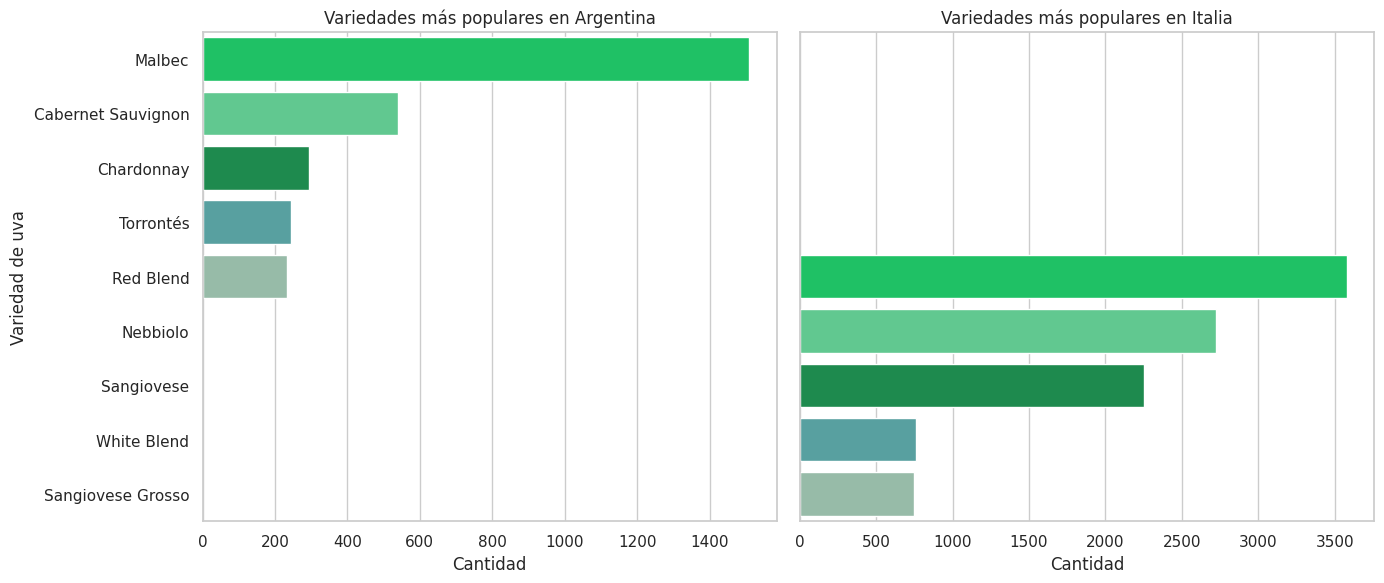

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
sns.barplot(
    data=top_varieties_arg,
    x='count', y='variety',
    palette=palette[:5],
    ax=ax[0]
)
ax[0].set_title('Variedades más populares en Argentina')
ax[0].set_xlabel('Cantidad')
ax[0].set_ylabel('Variedad de uva')

sns.barplot(
    data=top_varieties_ita,
    x='count', y='variety',
    palette=palette[:5],
    ax=ax[1]
)
ax[1].set_title('Variedades más populares en Italia')
ax[1].set_xlabel('Cantidad')

plt.tight_layout()
plt.show()

In [35]:
# Guardar resultados de variedades más populares
top_varieties_arg, top_varieties_ita

(      country             variety  count
 24  Argentina              Malbec   1510
 8   Argentina  Cabernet Sauvignon    540
 17  Argentina          Chardonnay    295
 62  Argentina           Torrontés    245
 44  Argentina           Red Blend    234,
     country            variety  count
 203   Italy          Red Blend   3577
 171   Italy           Nebbiolo   2724
 213   Italy         Sangiovese   2252
 254   Italy        White Blend    759
 214   Italy  Sangiovese Grosso    749)

## Pregunta 2: ¿Qué provincias producen los vinos mejor puntuados?

In [39]:
# Agrupar por país y provincia, y calcular la puntuación promedio
province_scores = (
    df_cleaned.groupby(['country', 'province'])['points']
    .mean()
    .reset_index()
    .sort_values(['country', 'points'], ascending=[True, False])
)

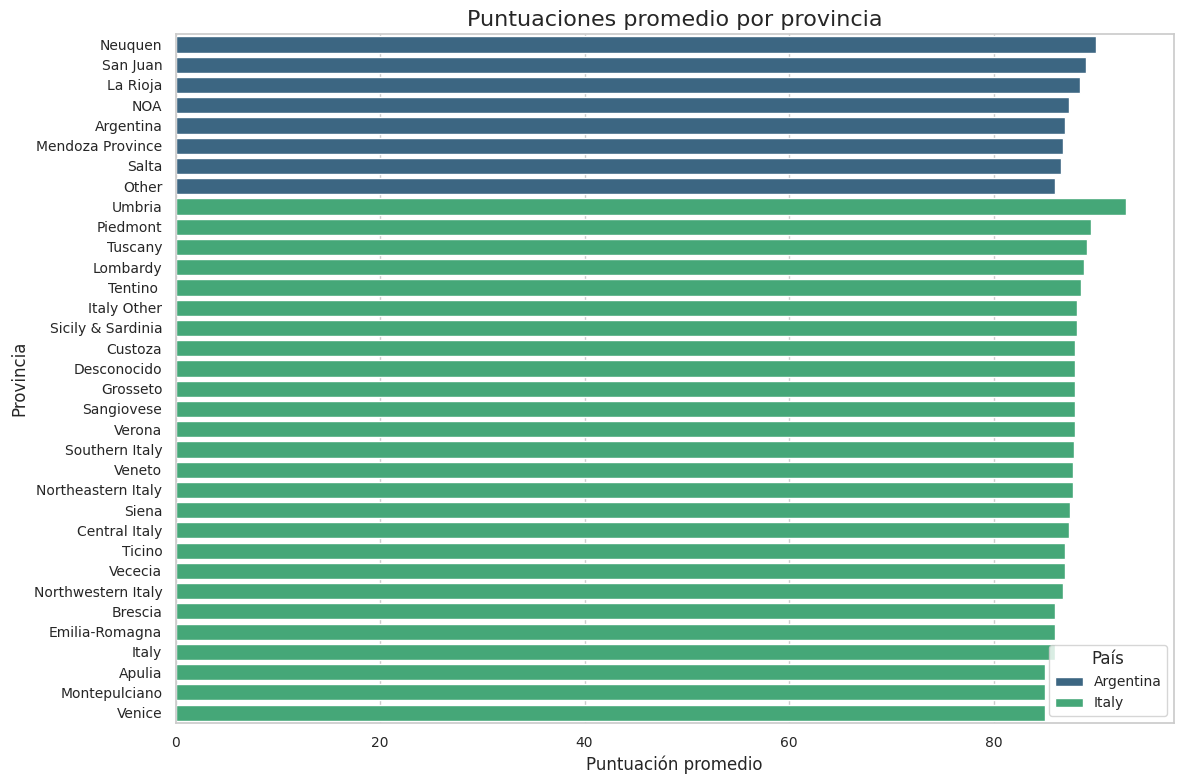

In [42]:
plt.figure(figsize=(12, 8))  # Ajusta el tamaño: ancho=12 pulgadas, alto=8 pulgadas
sns.barplot(data=province_scores, x='points', y='province', hue='country', palette="viridis")
plt.title('Puntuaciones promedio por provincia', fontsize=16)  # Tamaño del título
plt.xlabel('Puntuación promedio', fontsize=12)  # Etiqueta del eje X
plt.ylabel('Provincia', fontsize=12)  # Etiqueta del eje Y
plt.xticks(fontsize=10)  # Tamaño de las etiquetas en el eje X
plt.yticks(fontsize=10)  # Tamaño de las etiquetas en el eje Y
plt.legend(title='País', fontsize=10, title_fontsize=12)  # Leyenda
plt.tight_layout()  # Asegura que todo el contenido quede dentro del espacio
plt.show()

## Pregunta 3: ¿Existe una relación entre el precio y la puntuación de los vinos?

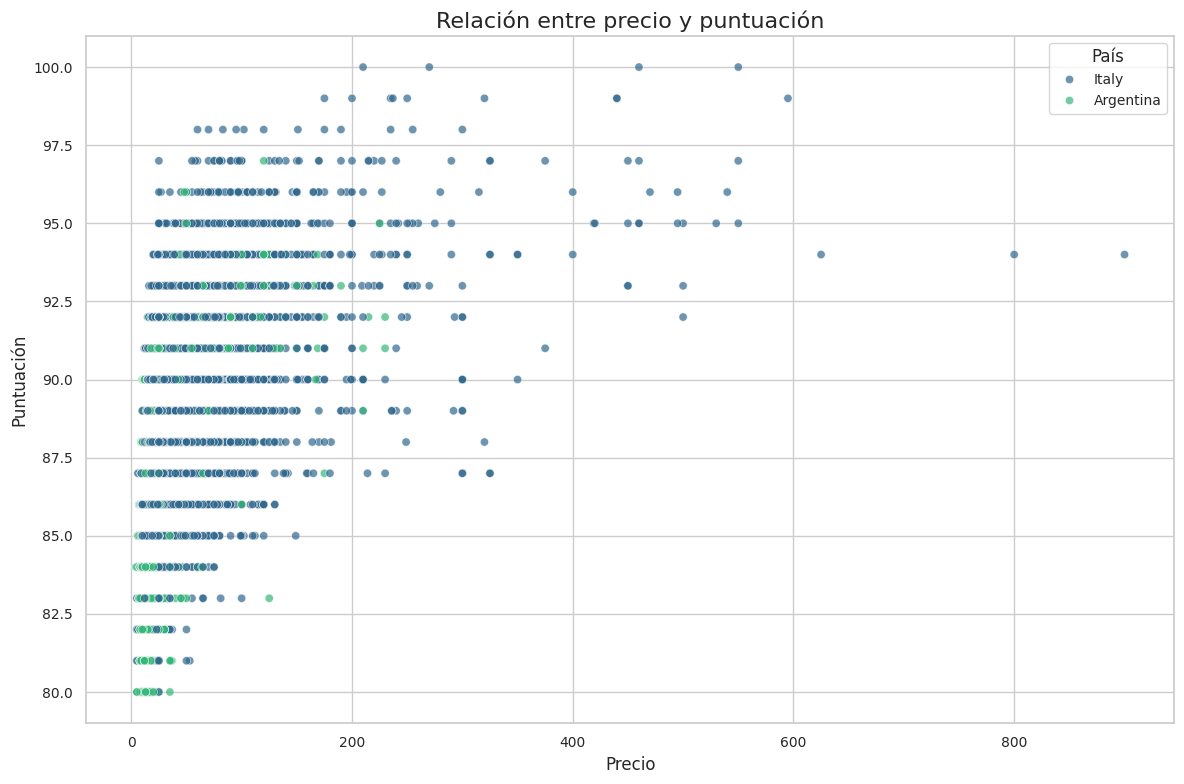

In [44]:
plt.figure(figsize=(12, 8))  # Cambia el tamaño del gráfico
sns.scatterplot(data=df_cleaned, x='price', y='points', hue='country', palette="viridis", alpha=0.7)
plt.title('Relación entre precio y puntuación', fontsize=16)  # Ajusta el tamaño del título
plt.xlabel('Precio', fontsize=12)  # Ajusta el tamaño de la etiqueta del eje X
plt.ylabel('Puntuación', fontsize=12)  # Ajusta el tamaño de la etiqueta del eje Y
plt.xticks(fontsize=10)  # Ajusta el tamaño de las etiquetas del eje X
plt.yticks(fontsize=10)  # Ajusta el tamaño de las etiquetas del eje Y
plt.legend(title='País', fontsize=10, title_fontsize=12)  # Ajusta el tamaño de la leyenda
plt.tight_layout()  # Asegura que todo quede bien dentro del gráfico
plt.show()

## Pregunta 4: ¿Cómo se distribuyen los precios en Argentina e Italia?

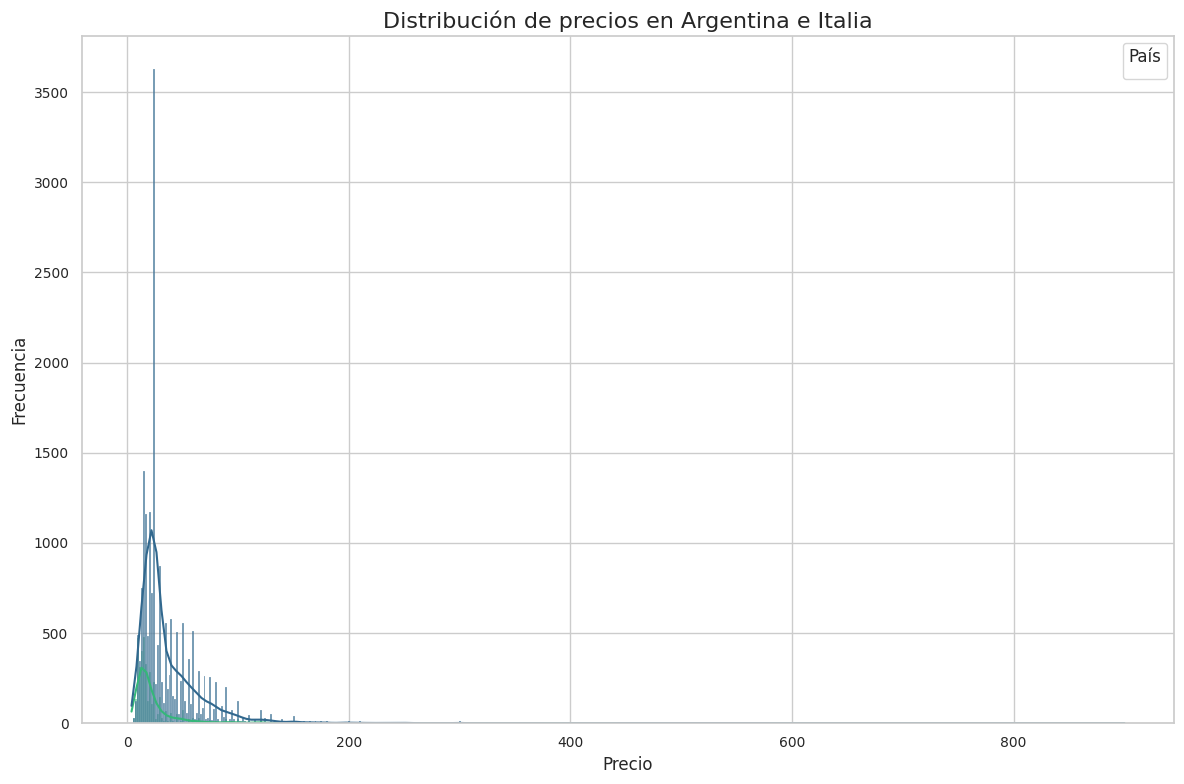

In [45]:
plt.figure(figsize=(12, 8))  # Ajusta el tamaño del gráfico
sns.histplot(data=df_cleaned, x='price', hue='country', kde=True, palette="viridis", alpha=0.7)
plt.title('Distribución de precios en Argentina e Italia', fontsize=16)  # Tamaño del título
plt.xlabel('Precio', fontsize=12)  # Tamaño de la etiqueta del eje X
plt.ylabel('Frecuencia', fontsize=12)  # Tamaño de la etiqueta del eje Y
plt.xticks(fontsize=10)  # Tamaño de las etiquetas del eje X
plt.yticks(fontsize=10)  # Tamaño de las etiquetas del eje Y
plt.legend(title='País', fontsize=10, title_fontsize=12)  # Tamaño de la leyenda
plt.tight_layout()  # Asegura que los elementos del gráfico no se superpongan
plt.show()

# OTROS GRAFICOS UTILES


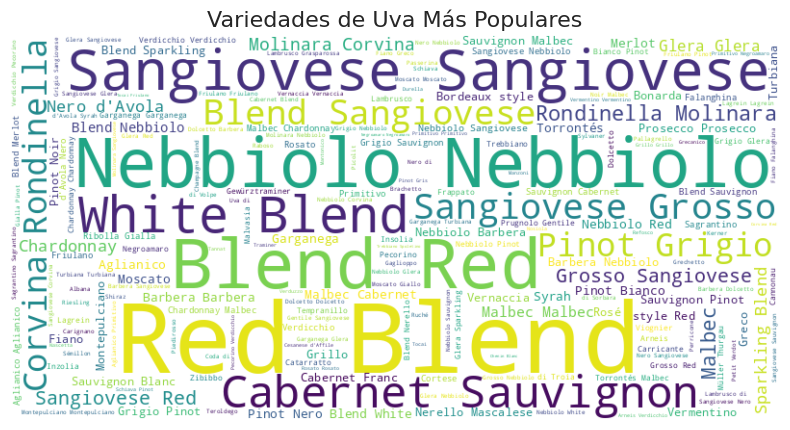

In [49]:
# Extraemos las variedades de uva del dataset
varieties = df_cleaned['variety'].dropna()  # Filtrar los valores no nulos

# Crear una cadena de texto con todas las variedades
text = ' '.join(varieties)

# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Mostrar el gráfico
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Variedades de Uva Más Populares', fontsize=16)
plt.show()

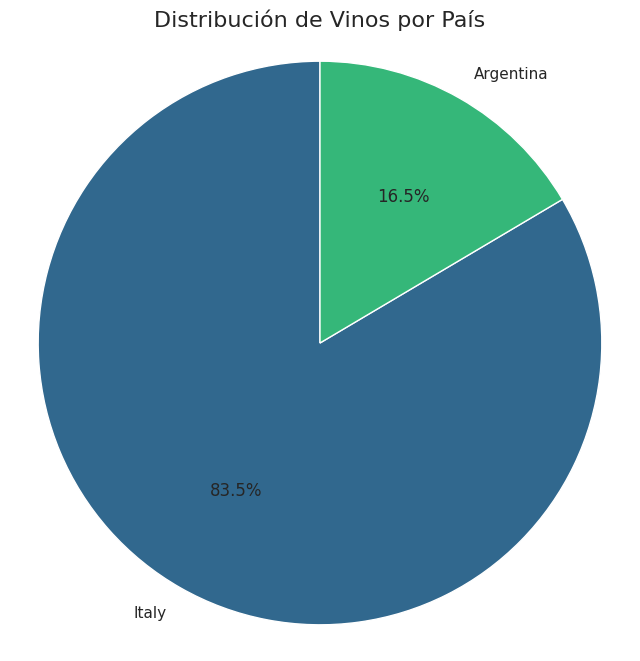

In [55]:
# Contamos la cantidad de vinos por país
country_counts = df_cleaned['country'].value_counts()

# Crear el gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("viridis", len(country_counts)))
plt.title('Distribución de Vinos por País', fontsize=16)
plt.axis('equal')  # Para que el gráfico sea circular
plt.show()